In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import os 

import datetime as dt 

from investing import utils 

from skfolio import Population, Portfolio, RiskMeasure
from skfolio.optimization import InverseVolatility, HierarchicalRiskParity, EqualWeighted
from skfolio.model_selection import WalkForward, cross_val_predict

from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = '../../../data/'
STOCK_PATH = os.path.join(DATA_PATH, 'stocks')
PORTFOLIO_PATH = os.path.join(DATA_PATH, 'portfolios')

In [20]:
tickers = utils.read_tickers_from_file(os.path.join(PORTFOLIO_PATH, 'momentum.txt'))
tickers

['NESTLEIND.NS',
 'ACCELYA.NS',
 'WEALTH.NS',
 'ADVANIHOTR.NS',
 'ABBOTINDIA.NS',
 'GANESHHOUC.NS',
 '503816.BO',
 '514448.BO',
 '507948.BO',
 '526506.BO',
 '511571.BO',
 '542668.BO',
 '526721.BO',
 '504605.BO',
 '509438.BO']

In [21]:
df = utils.download_and_cache(tickers, STOCK_PATH)

In [23]:
min_data_stock = tickers[np.argmin([df[t].shape[0] for t in tickers])]
print(min_data_stock)
df[min_data_stock]

542668.BO


,Open,High,Low,Close,Volume
Date,,,,,
2019-05-13,24.251827,25.459772,24.251827,25.459772,32000
2019-05-14,26.714176,26.714176,26.714176,26.714176,8000
2019-05-15,26.714176,26.714176,26.714176,26.714176,0
2019-05-16,29.432051,29.432051,29.432051,29.432051,12000
2019-05-17,29.432051,29.432051,29.432051,29.432051,0
...,...,...,...,...,...
2024-08-19,275.000000,279.850006,275.000000,279.850006,1000
2024-08-20,283.649994,305.000000,283.649994,305.000000,5000
2024-08-21,305.000000,305.000000,295.000000,305.000000,2500


In [24]:
df_close = pd.concat([
    df[t].Close.rename(t)
    for t in tickers
], axis=1).dropna()
df_close

,NESTLEIND.NS,ACCELYA.NS,WEALTH.NS,ADVANIHOTR.NS,ABBOTINDIA.NS,GANESHHOUC.NS,503816.BO,514448.BO,507948.BO,526506.BO,511571.BO,542668.BO,526721.BO,504605.BO,509438.BO
Date,,,,,,,,,,,,,,,
2019-05-13,959.479553,762.668213,79.189606,27.312155,6903.315918,51.099159,3.100000,45.932266,13.000000,43.404831,3.040000,25.459772,22.276678,402.267212,1408.825562
2019-05-14,950.033752,759.773010,80.911110,26.005352,6881.991699,50.266281,3.255000,49.875950,13.000000,44.949665,3.190000,26.714176,21.477728,382.177063,1345.671509
2019-05-15,956.545288,746.579346,80.911110,26.419170,6894.691406,50.560238,3.415000,50.819336,13.000000,44.949665,3.190000,26.714176,22.135685,363.156616,1325.461792
2019-05-16,957.663147,742.856995,80.911110,26.092476,6815.364258,50.217289,3.510000,47.030312,13.000000,46.843334,3.190000,29.432051,21.571720,353.437042,1385.507202
2019-05-17,974.905701,743.601440,80.911110,26.854774,7015.009277,51.442104,3.490000,49.473846,13.000000,46.843334,3.190000,29.432051,21.994694,341.810852,1385.507202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19,2503.149902,1724.400024,1327.849976,77.879997,28098.599609,913.250000,113.250000,1429.800049,216.850006,1245.250000,109.400002,279.850006,145.963028,2965.800049,7834.349609
2024-08-20,2518.500000,1758.250000,1332.300049,76.940002,27818.400391,885.700012,109.349998,1440.500000,227.649994,1263.699951,109.000000,305.000000,145.613815,2922.300049,7886.585449
2024-08-21,2551.750000,1769.400024,1269.750000,75.959999,28525.400391,881.950012,110.449997,1440.099976,239.000000,1317.900024,109.650002,305.000000,148.656799,3010.000000,7961.549805


## Optimization

In [25]:
df_ret = df_close.pct_change().dropna()

df_ret.describe()

,NESTLEIND.NS,ACCELYA.NS,WEALTH.NS,ADVANIHOTR.NS,ABBOTINDIA.NS,GANESHHOUC.NS,503816.BO,514448.BO,507948.BO,526506.BO,511571.BO,542668.BO,526721.BO,504605.BO,509438.BO
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,0.000845,0.000930,0.002605,0.001234,0.001239,0.002826,0.003378,0.003317,0.002657,0.003184,0.003383,0.002865,0.001903,0.002083,0.001623
std,0.014282,0.023706,0.029538,0.029934,0.016526,0.036421,0.034875,0.036104,0.027975,0.031296,0.036554,0.044159,0.029450,0.031270,0.024807
min,-0.084893,-0.174646,-0.126778,-0.200000,-0.099465,-0.100251,-0.097382,-0.130117,-0.086505,-0.128967,-0.151694,-0.200000,-0.093473,-0.119199,-0.101662
25%,-0.007190,-0.010517,-0.008992,-0.013067,-0.007770,-0.020954,-0.019710,-0.015524,-0.010050,-0.010310,-0.019890,-0.001203,-0.013841,-0.017811,-0.012203
50%,0.000102,-0.000340,0.000000,-0.001088,-0.000120,-0.000107,0.000000,-0.000691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.007905,0.009676,0.011543,0.013469,0.008214,0.021912,0.038275,0.018829,0.019717,0.019819,0.025320,0.010051,0.016354,0.019975,0.013708
max,0.128040,0.129168,0.214286,0.169863,0.112270,0.199954,0.155481,0.199975,0.102413,0.192987,0.200000,0.321502,0.199816,0.191251,0.162379


In [26]:
model_inv_vol = InverseVolatility()
portfolio = model_inv_vol.fit_predict(df_ret)

In [27]:
portfolio.summary().to_frame()

,0
Mean,0.20%
Annualized Mean,51.53%
Variance,0.0081%
Annualized Variance,2.04%
Semi-Variance,0.0043%
Annualized Semi-Variance,1.09%
Standard Deviation,0.90%
Annualized Standard Deviation,14.28%
Semi-Deviation,0.66%
Annualized Semi-Deviation,10.45%


In [28]:
portfolio.plot_composition()

In [29]:
portfolio.plot_cumulative_returns()

In [30]:
cv = WalkForward(train_size=100, test_size=30, expend_train=True)
mp = cross_val_predict(InverseVolatility(), 
                  X=df_ret, 
                  cv=cv)
mp.name = 'Volatility Minimization'
mp.summary().to_frame()

,0
Mean,0.20%
Annualized Mean,50.70%
Variance,0.0080%
Annualized Variance,2.02%
Semi-Variance,0.0043%
Annualized Semi-Variance,1.08%
Standard Deviation,0.89%
Annualized Standard Deviation,14.20%
Semi-Deviation,0.65%
Annualized Semi-Deviation,10.39%


In [31]:
mp.plot_rolling_measure()

In [32]:
model_hier_cluster = HierarchicalRiskParity(
    risk_measure = RiskMeasure.CVAR,
    portfolio_params = dict(name = 'Hierarchical Clustering')
)

mp_hier_cluster = cross_val_predict(model_hier_cluster, df_ret, cv=cv)
mp_hier_cluster.name = 'Hierarchical Clustering'

pop = Population([mp, mp_hier_cluster])
pop.set_portfolio_params(compounded=True)
pop.plot_cumulative_returns(log_scale=True)

<Axes: xlabel='Date'>

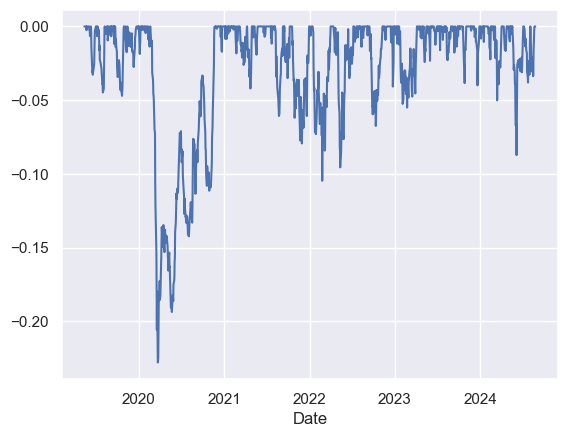

In [34]:
sns.lineplot(x=portfolio.X.index, y=portfolio.drawdowns)